In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
import matplotlib.pyplot as plt
import seaborn as sns

Partimos de datos de variables energéticas mundiales para todos los países a partir de 1980 inclusive. 
<br> Se han eliminado las filas correspondientes a regiones o continentes. 
<br> Se han imputado los valores nulos. 

In [228]:
wec = pd.read_csv(r"../datasets/wec_1980_sinreg.csv")

# Relación entre Energía per capita y GDP (PBI)

In [229]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values = wec.groupby('country').agg({'energy_per_capita': 'mean', 'primary_energy_consumption': 'mean', 
'gdp': 'mean', 'population': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
df = pd.DataFrame({'country': mean_values['country'],
                          'mean_epc': mean_values['energy_per_capita'],
                          'mean_gdp': mean_values['gdp'],
                          'mean_pec': mean_values['primary_energy_consumption'],
                          'mean_pop': mean_values['population']})

In [12]:
epc1 = mean_values.sort_values("energy_per_capita", ascending=False)

In [14]:
epc1.head(10)

,country,energy_per_capita,primary_energy_consumption,gdp,population
76,Gibraltar,877841.144675,28.873000,1.000000e+11,3.137500e+04
159,Qatar,225705.332400,227.035150,1.034355e+11,1.064475e+06
209,United States Virgin Islands,223684.883250,23.876275,1.720000e+13,1.058000e+05
205,United Arab Emirates,155922.984200,642.926775,4.384500e+11,4.462900e+06
13,Bahrain,149517.080575,120.608575,2.490023e+10,8.159000e+05
90,Iceland,117589.597000,34.658600,9.806153e+09,2.829500e+05
176,Singapore,114564.999366,508.214756,1.748523e+11,4.049976e+06
33,Canada,109242.251805,3366.701610,1.113195e+12,3.080202e+07
147,Norway,104067.727317,477.551146,2.444146e+11,4.593659e+06
197,Trinidad and Tobago,104045.742025,134.988000,2.197852e+10,1.265450e+06


In [15]:
epc1.tail(10)

,country,energy_per_capita,primary_energy_consumption,gdp,population
203,Uganda,449.820750,12.360525,3.579687e+10,2.495710e+07
36,Central African Republic,443.088400,1.575275,3.455231e+09,3.546375e+06
29,Burkina Faso,421.928975,5.785575,1.732056e+10,1.220715e+07
180,Somalia,420.614875,3.597375,5.916138e+10,9.574000e+06
163,Rwanda,403.165925,3.217650,9.508097e+09,8.208650e+06
63,Ethiopia,400.272075,30.403000,7.631270e+10,6.785545e+07
141,Niger,383.808200,4.772425,9.735979e+09,1.235445e+07
30,Burundi,201.428825,1.363200,6.871967e+09,6.988175e+06
37,Chad,134.439800,1.083025,1.205361e+10,8.963475e+06
146,Northern Mariana Islands,0.000000,0.000000,2.916270e+10,4.637838e+04


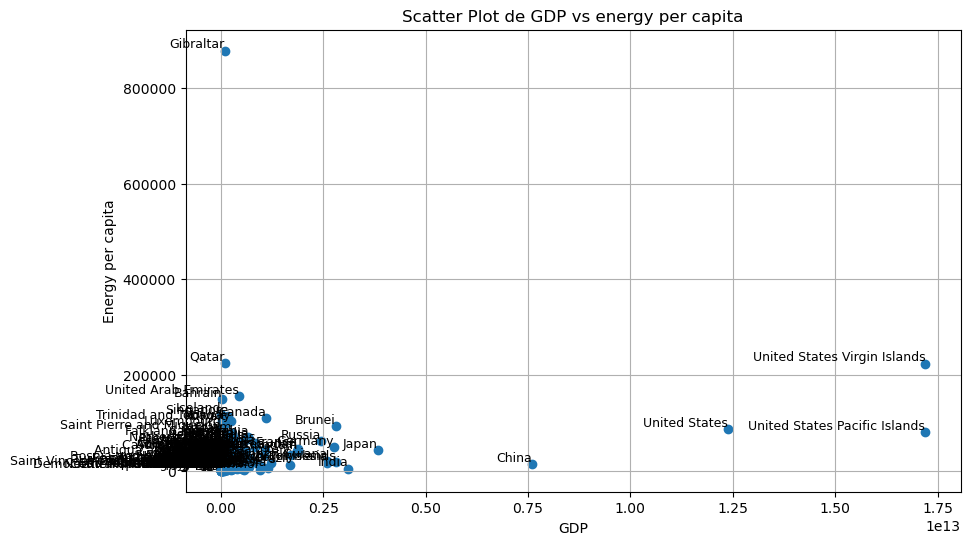

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_values['gdp'], mean_values['energy_per_capita'])
for i, country in enumerate(mean_values["country"]):
    plt.text(mean_values["gdp"].iloc[i], mean_values["energy_per_capita"].iloc[i], country, fontsize=9, ha='right', va='bottom')
plt.title('Scatter Plot de GDP vs energy per capita')
plt.xlabel('GDP')
plt.ylabel('Energy per capita')
plt.grid(True)
plt.show()

In [112]:
mean_values2 = mean_values[(mean_values["country"] != "United States") & 
(mean_values["country"] != "United States Pacific Islands") &
(mean_values["country"] != "United States Virgin Islands") &
(mean_values["country"] !=  "China") &
(mean_values["country"] !=  "Gibraltar") &
(mean_values["country"] !=  "USSR") &
(mean_values["country"] !=  "India")]

In [113]:
mean_values2.shape

(214, 5)

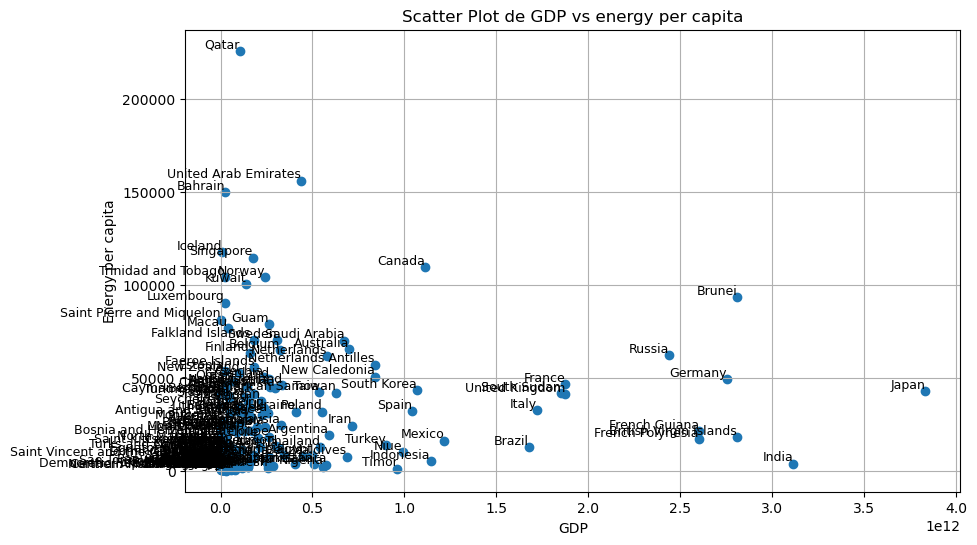

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(mean_values2['gdp'], mean_values2['energy_per_capita'])
for i, country in enumerate(mean_values2["country"]):
    plt.text(mean_values2["gdp"].iloc[i], mean_values2["energy_per_capita"].iloc[i], country, fontsize=9, ha='right', va='bottom')
plt.title('Scatter Plot de GDP vs energy per capita')
plt.xlabel('GDP')
plt.ylabel('Energy per capita')
plt.grid(True)
plt.show()

# MODELO NO SUPERVISADO: K-means

In [33]:
# Se importan las librerías que se utilizarán: 
# import pandas as pd
# import numpy as np
import sklearn
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.cluster import KMeans
# import re
# import array
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

Selección de features

In [225]:
features = ["gdp", "primary_energy_consumption"]
X = mean_values[features]
# X = suram[features]
X.head(5)

,gdp,primary_energy_consumption
0,3.626833e+10,17.649525
1,1.925028e+10,36.627075
2,3.199250e+11,377.235475
3,5.340000e+11,2.109125
4,5.485567e+10,48.328450


Escalado

In [116]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_scal = scale.fit_transform(X)

In [117]:
pd.DataFrame(X_scal).shape

(214, 2)

### Método del codo 

In [118]:
#Se realiza el método del codo para determinar la cantidad de clusters
k=np.arange(1,11)
lista_inercias = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0) 
# Instancia la clase KMeans
    kmeans.fit(X_scal)  
# Ajusta el modelo KMeans a tus datos x
    lista_inercias.append(kmeans.inertia_)

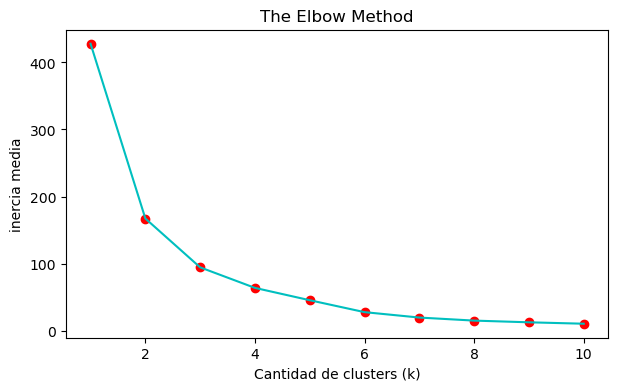

In [119]:
# Se grafica el método del codo
plt.figure(figsize=(7, 4))
plt.plot(k, lista_inercias, color='c')
plt.scatter(k, lista_inercias, c='r')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('inercia media')
plt.title('The Elbow Method')
plt.show()

### Método Silhouette 

In [120]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 3
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X_scal)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scal, labels, metric='euclidean'))

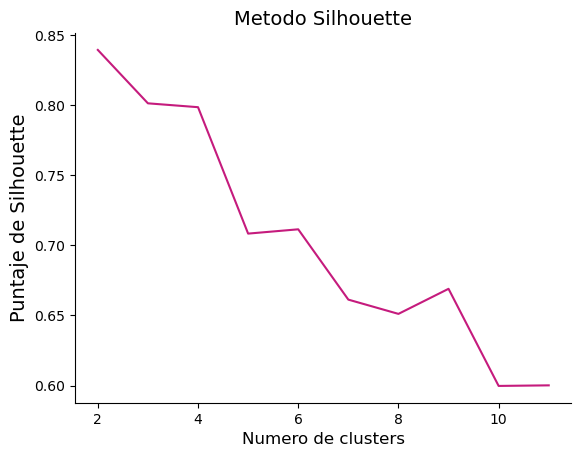

In [121]:
# Se grafica
plt.plot(range(2,12),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

2 clusters

In [122]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel2 = KMeans(n_clusters=2, random_state=0)
kmeansmodel2.fit(X_scal)
# Etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)
# Se hace la predicción:
y_means2=kmeansmodel2.fit_predict(X_scal)

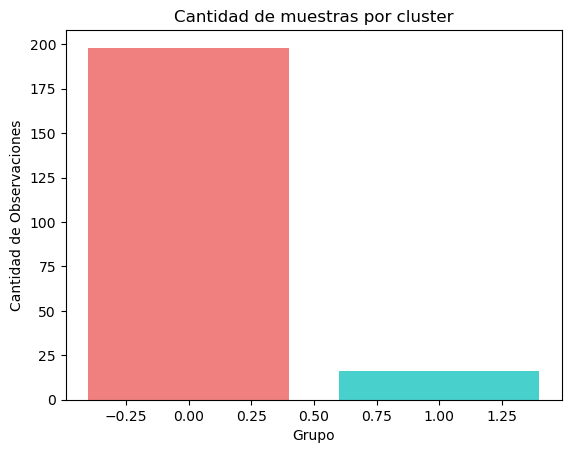

In [123]:
# cantidad de observaciones por cluster
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [124]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel3 = KMeans(n_clusters=3, random_state=0)
kmeansmodel3.fit(X_scal)
# Etiquetas de los clusters
etiquetas_3 = kmeansmodel3.labels_
np.unique(etiquetas_3)
# Se hace la predicción:
y_means3=kmeansmodel3.fit_predict(X_scal)

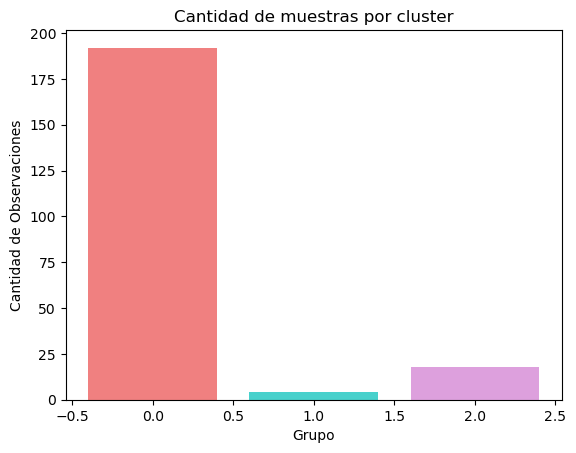

In [126]:
# cantidad de observaciones por cluster
cluster_counts = np.bincount(y_means3)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [127]:
# Se observan las coordenandas de los centroides
centroids3 =kmeansmodel3.cluster_centers_
print(centroids3)

[[-0.2842014  -0.23054759]
 [ 4.41153944  5.66877737]
 [ 2.05113952  1.19944594]]


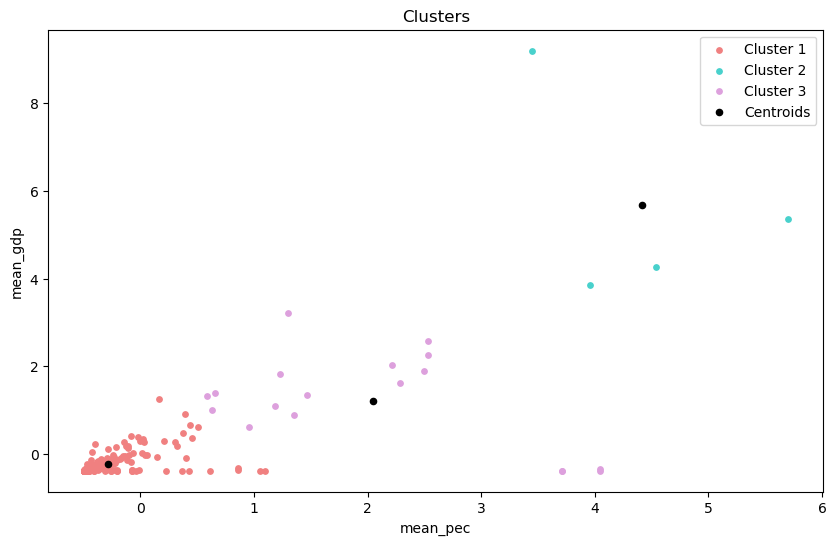

In [128]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scal[y_means3 == 0, 0], X_scal[y_means3 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means3 == 1, 0], X_scal[y_means3 == 1, 1], s = 15, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(X_scal[y_means3 == 2, 0], X_scal[y_means3 == 2, 1], s = 15, c = 'plum', label = 'Cluster 3')
plt.scatter(kmeansmodel3.cluster_centers_[:, 0], kmeansmodel3.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('mean_pec')
plt.ylabel('mean_gdp')
plt.legend()
plt.show()

In [130]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel4 = KMeans(n_clusters=4, random_state=0)
kmeansmodel4.fit(X_scal)
# Etiquetas de los clusters
etiquetas_4 = kmeansmodel4.labels_
np.unique(etiquetas_4)
# Se hace la predicción:
y_means4=kmeansmodel4.fit_predict(X_scal)

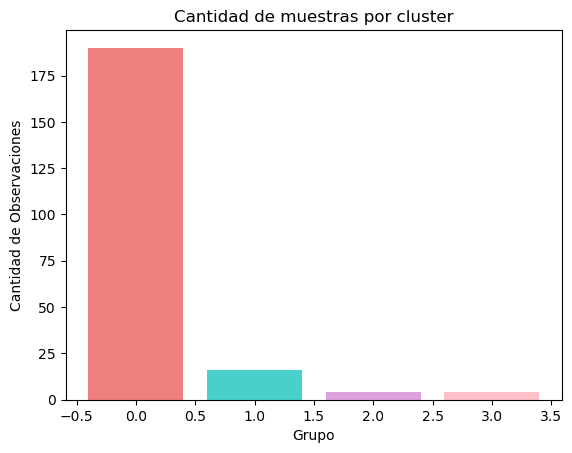

In [135]:
# cantidad de observaciones por cluster
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum', "pink"]
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [134]:
# Se observan las coordenandas de los centroides
centroids4 =kmeansmodel4.cluster_centers_
print(centroids4)

[[-0.29012155 -0.24438743]
 [ 1.37307083  1.57729254]
 [ 3.87695069 -0.36954458]
 [ 4.41153944  5.66877737]]


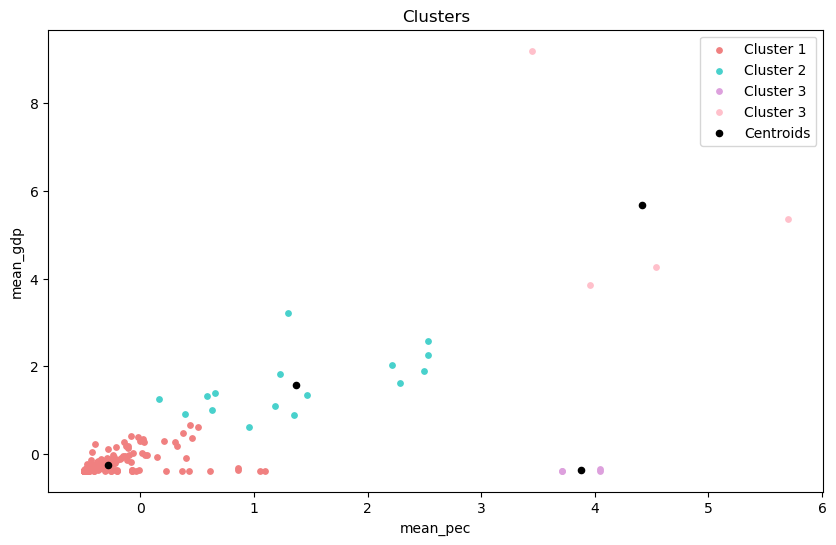

In [136]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scal[y_means4 == 0, 0], X_scal[y_means4 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means4 == 1, 0], X_scal[y_means4 == 1, 1], s = 15, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(X_scal[y_means4 == 2, 0], X_scal[y_means4 == 2, 1], s = 15, c = 'plum', label = 'Cluster 3')
plt.scatter(X_scal[y_means4 == 3, 0], X_scal[y_means4 == 3, 1], s = 15, c = 'pink', label = 'Cluster 3')
plt.scatter(kmeansmodel4.cluster_centers_[:, 0], kmeansmodel4.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('mean_pec')
plt.ylabel('mean_gdp')
plt.legend()
plt.show()

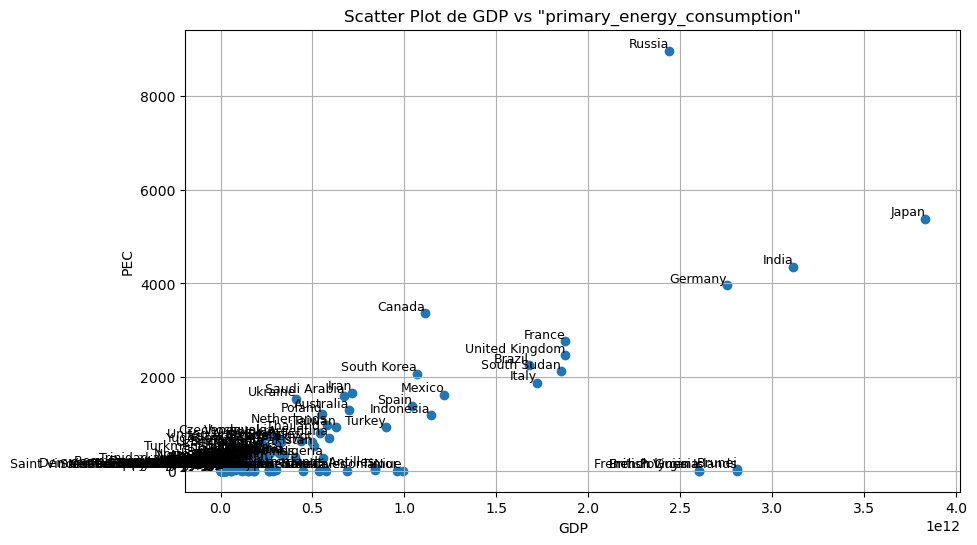

In [129]:
# Graficar el scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mean_values2['gdp'], mean_values2["primary_energy_consumption"])
for i, country in enumerate(mean_values2["country"]):
    plt.text(mean_values2["gdp"].iloc[i], mean_values2["primary_energy_consumption"].iloc[i], country, fontsize=9, ha='right', va='bottom')
plt.title('Scatter Plot de GDP vs "primary_energy_consumption"')
plt.xlabel('GDP')
plt.ylabel('PEC')
plt.grid(True)
plt.show()

# 4 features

In [230]:
features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]
# features = ["gdp", "primary_energy_consumption"]
X = mean_values[features]
# X = suram[features]
X.head(5)

,gdp,energy_per_capita,primary_energy_consumption,population
0,3.626833e+10,851.131425,17.649525,21958825.0
1,1.925028e+10,12210.113550,36.627075,3026025.0
2,3.199250e+11,12039.368300,377.235475,30730125.0
3,5.340000e+11,42207.508000,2.109125,51425.0
4,5.485567e+10,2505.437650,48.328450,17583950.0


In [198]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_scal = scale.fit_transform(X_)

In [199]:
pd.DataFrame(X_scal).shape

(161, 5)

### Método del codo 

In [200]:
#Se realiza el método del codo para determinar la cantidad de clusters
k=np.arange(1,11)
lista_inercias = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0) 
# Instancia la clase KMeans
    kmeans.fit(X_scal)  
# Ajusta el modelo KMeans a tus datos x
    lista_inercias.append(kmeans.inertia_)

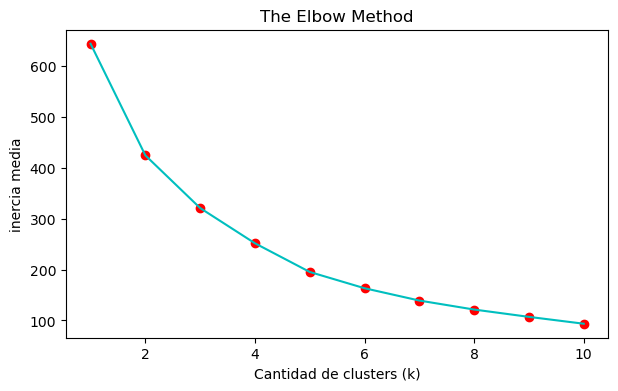

In [201]:
# Se grafica el método del codo
plt.figure(figsize=(7, 4))
plt.plot(k, lista_inercias, color='c')
plt.scatter(k, lista_inercias, c='r')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('inercia media')
plt.title('The Elbow Method')
plt.show()

### Método Silhouette 

In [202]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 3
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X_scal)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scal, labels, metric='euclidean'))

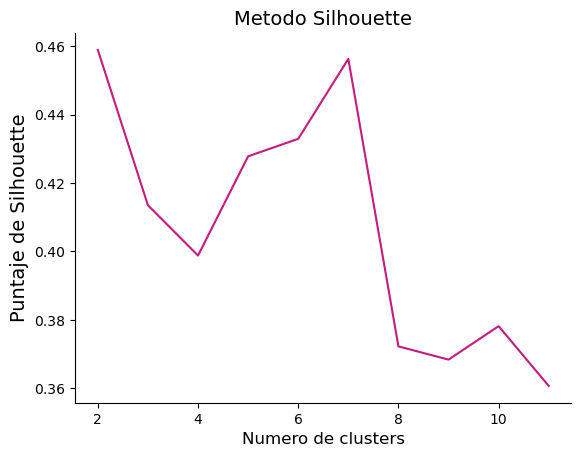

In [203]:
# Se grafica
plt.plot(range(2,12),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [204]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel2 = KMeans(n_clusters=7, random_state=0)
kmeansmodel2.fit(X_scal)
# Etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)
# Se hace la predicción:
y_means2=kmeansmodel2.fit_predict(X_scal)

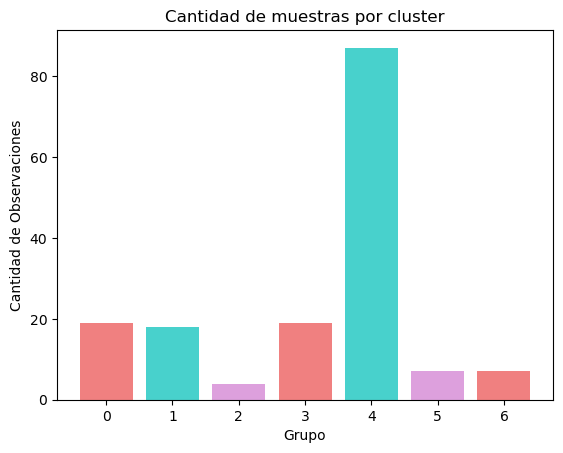

In [207]:
# cantidad de observaciones por cluster
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [208]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[-0.18303969 -0.73411458 -0.14078112  1.72379131  0.        ]
 [-0.01635412  1.76487856 -0.42609017 -0.7838265   0.        ]
 [ 1.71567383  2.04123842  3.55902644  0.52221393  0.        ]
 [ 0.70090827  0.97042191  1.14942113  0.040985    0.        ]
 [-0.52137796 -0.48519657 -0.45132627 -0.37701992  0.        ]
 [ 1.38603597 -0.11789822  2.52184238  2.43685979  0.        ]
 [ 2.74997234 -0.19788824 -0.58830772 -0.82400206  0.        ]]


In [209]:
# Transformar los centroides escalados a la escala original
centroids_original = scale.inverse_transform(centroids2)

In [210]:
# features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]

centroids_original

array([[6.59673315e+10, 3.38755635e+03, 6.87104800e+01, 2.15108796e+07,
        0.00000000e+00],
       [8.39114999e+10, 5.05176083e+04, 2.70142175e+01, 6.27165001e+05,
        0.00000000e+00],
       [2.70369156e+11, 5.57296492e+04, 6.09415878e+02, 1.15040122e+07,
        0.00000000e+00],
       [1.61126803e+11, 3.55344607e+04, 2.57266049e+02, 7.49628512e+06,
        0.00000000e+00],
       [2.95442703e+10, 8.08205449e+03, 2.33261087e+01, 4.01509460e+06,
        0.00000000e+00],
       [2.34882718e+11, 1.50091605e+04, 4.57837449e+02, 2.74493917e+07,
        0.00000000e+00],
       [3.81714286e+11, 1.35005795e+04, 3.30706429e+00, 2.92578571e+05,
        0.00000000e+00]])

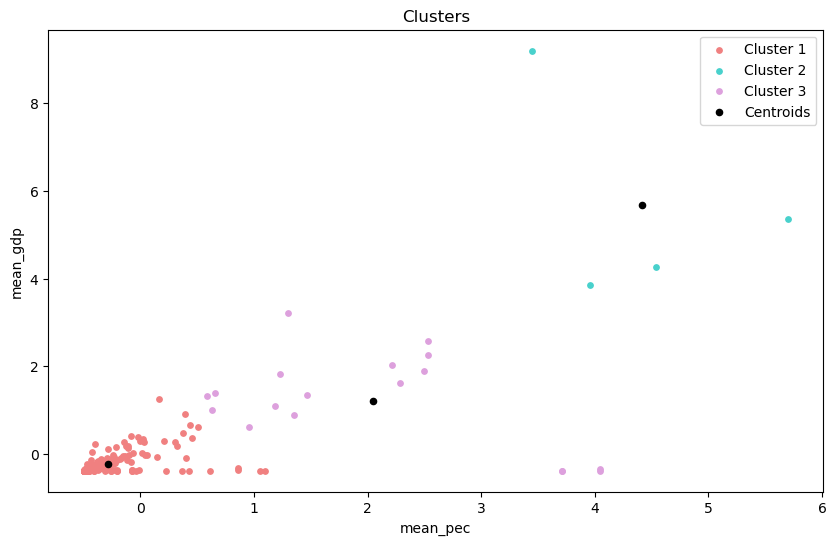

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_scal[y_means3 == 0, 0], X_scal[y_means3 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means3 == 1, 0], X_scal[y_means3 == 1, 1], s = 15, c = 'mediumturquoise', label = 'Cluster 2')
plt.scatter(X_scal[y_means3 == 2, 0], X_scal[y_means3 == 2, 1], s = 15, c = 'plum', label = 'Cluster 3')
plt.scatter(kmeansmodel3.cluster_centers_[:, 0], kmeansmodel3.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('mean_pec')
plt.ylabel('mean_gdp')
plt.legend()
plt.show()

In [211]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=8)
kmeans.fit(X_scal)
calinski_harabasz = calinski_harabasz_score(X_scal, etiquetas_2)


In [212]:
calinski_harabasz

93.16680423919756

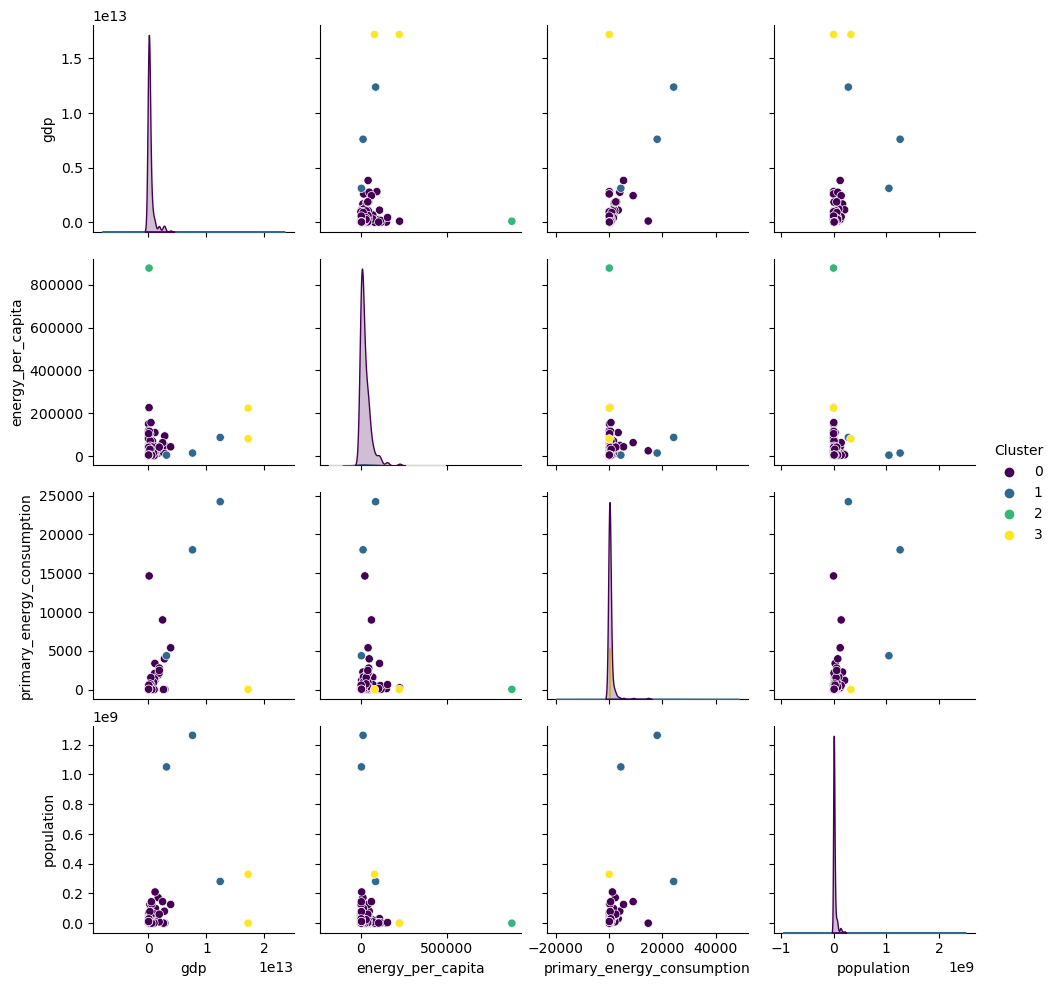

In [214]:
# Supongamos que 'X' es tu conjunto de datos con 4 features y 'labels' son las etiquetas de cluster obtenidas por K-Means
X_['Cluster'] = kmeans.labels_

sns.pairplot(X, hue='Cluster', palette='viridis')
plt.show()


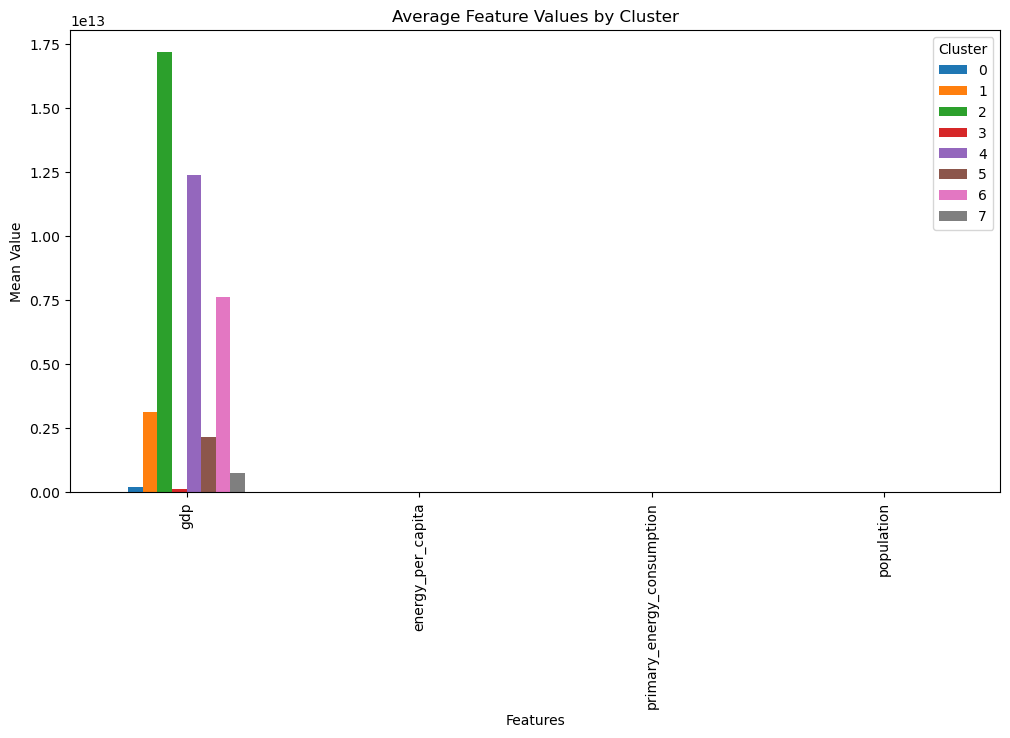

In [179]:
# Supongamos que 'X' es tu conjunto de datos con 4 features y 'labels' son las etiquetas de cluster obtenidas por K-Means
cluster_means = X.groupby('Cluster').mean()

# Graficar los perfiles promedio de cada cluster
cluster_means.T.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Average Feature Values by Cluster')
plt.show()


In [215]:
g2 = X_.sort_values("population", ascending=False)
g2.head(5)

,gdp,energy_per_capita,primary_energy_consumption,population,Cluster
40,3.438293e+11,8455.517829,337.272927,3.915961e+07,6
192,6.080559e+10,729.037300,27.542075,3.485155e+07,2
102,7.689183e+10,1524.145075,50.354575,3.262480e+07,2
2,3.199250e+11,12039.368300,377.235475,3.073012e+07,6
217,6.272208e+10,2525.176000,567.872946,2.916200e+07,6


4 clusters

In [182]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel4 = KMeans(n_clusters=4, random_state=0)
kmeansmodel4.fit(X_scal)
# Etiquetas de los clusters
etiquetas_4 = kmeansmodel4.labels_
np.unique(etiquetas_4)
# Se hace la predicción:
y_means4=kmeansmodel4.fit_predict(X_scal)

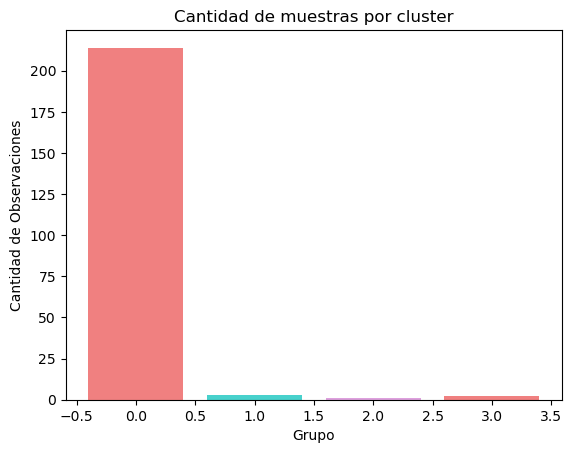

In [183]:
# cantidad de observaciones por cluster
cluster_counts = np.bincount(y_means4)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()

In [184]:
# Se observan las coordenandas de los centroides
centroids4 =kmeansmodel4.cluster_centers_
print(centroids4)

[[-0.12997012 -0.07761013 -0.0839827  -0.11073705]
 [ 3.66254775  0.07445877  6.2361211   7.20607274]
 [-0.23047726 12.72181129 -0.24078595 -0.25315181]
 [ 8.52822     1.83168983 -0.24763967  1.16633071]]


In [185]:
# Transformar los centroides escalados a la escala original
centroids_original4 = scale.inverse_transform(centroids4)

In [186]:
# features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]

centroids_original4

array([[2.96224626e+11, 2.44969841e+04, 4.03979618e+02, 1.65408580e+07],
       [7.70052846e+12, 3.46354977e+04, 1.55230076e+04, 8.64744659e+08],
       [1.00000000e+11, 8.77841145e+05, 2.88730000e+01, 3.13750000e+04],
       [1.72000000e+13, 1.51791017e+05, 1.24774483e+01, 1.64585396e+08]])

In [187]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scal)
calinski_harabasz4 = calinski_harabasz_score(X_scal, etiquetas_4)


In [188]:
calinski_harabasz4

190.66609539245871

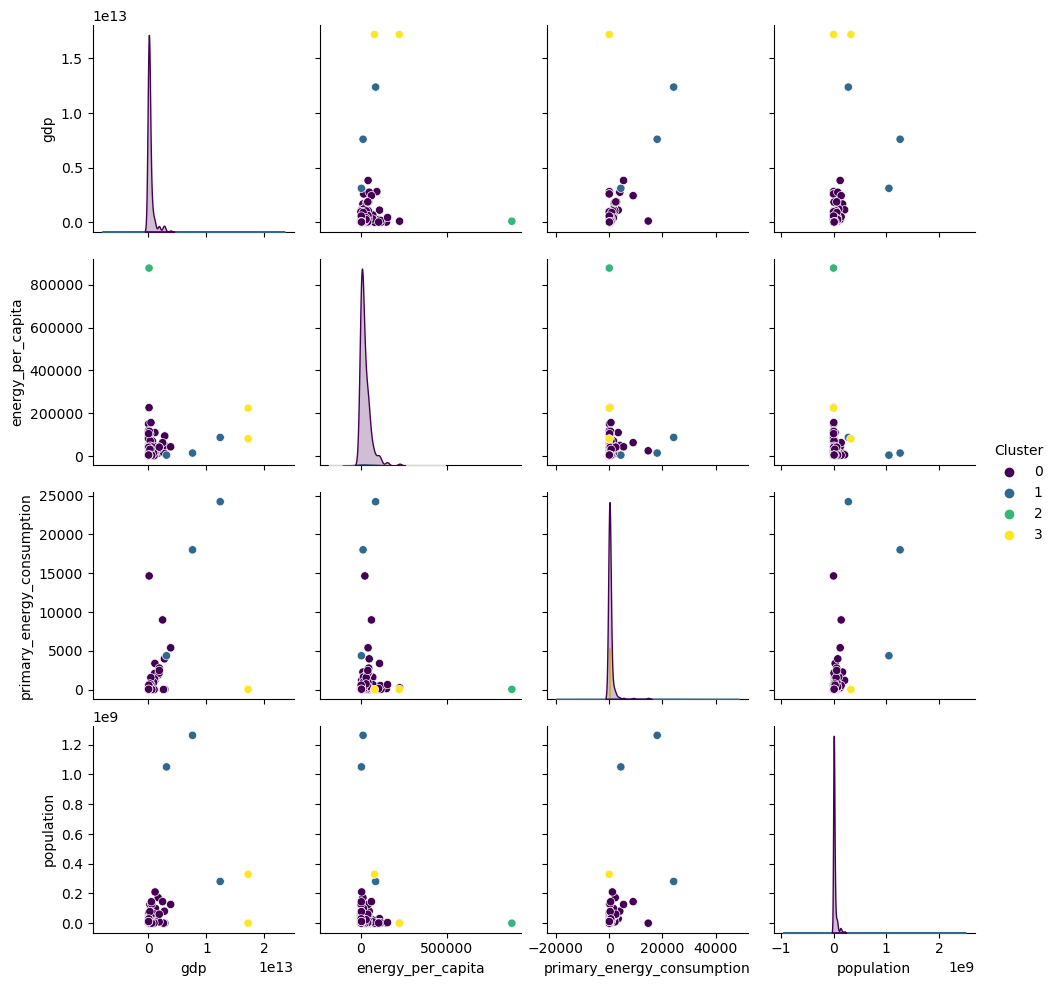

In [189]:
# Supongamos que 'X' es tu conjunto de datos con 4 features y 'labels' son las etiquetas de cluster obtenidas por K-Means
X['Cluster'] = etiquetas_4

sns.pairplot(X, hue='Cluster', palette='viridis')
plt.show()


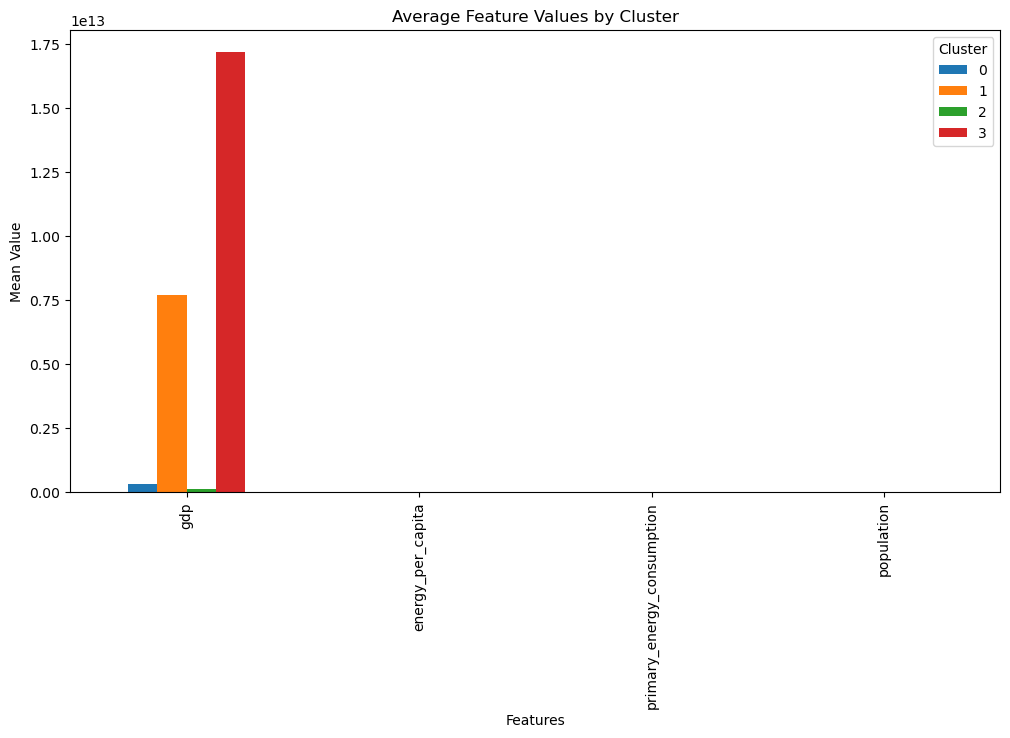

In [190]:
# Supongamos que 'X' es tu conjunto de datos con 4 features y 'labels' son las etiquetas de cluster obtenidas por K-Means
cluster_means2 = X.groupby('Cluster').mean()

# Graficar los perfiles promedio de cada cluster
cluster_means2.T.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Average Feature Values by Cluster')
plt.show()


In [231]:
Q1 = X.quantile(0.10)
Q3 = X.quantile(0.90)
IQR = Q3 - Q1

# Encuentra las posiciones de los outliers
outlier_positions = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)



In [232]:
outlier_positions

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25      True
26      True
27      True
28     False
29     False
30     False
31     False
32     False
33      True
34     False
35     False
36     False
37     False
38     False
39      True
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68      True
69      True
70      True
71     False
72     False
73     False
74      True
75     False
76      True

In [233]:
X_= X[~outlier_positions]


In [234]:
X_.shape

(201, 4)

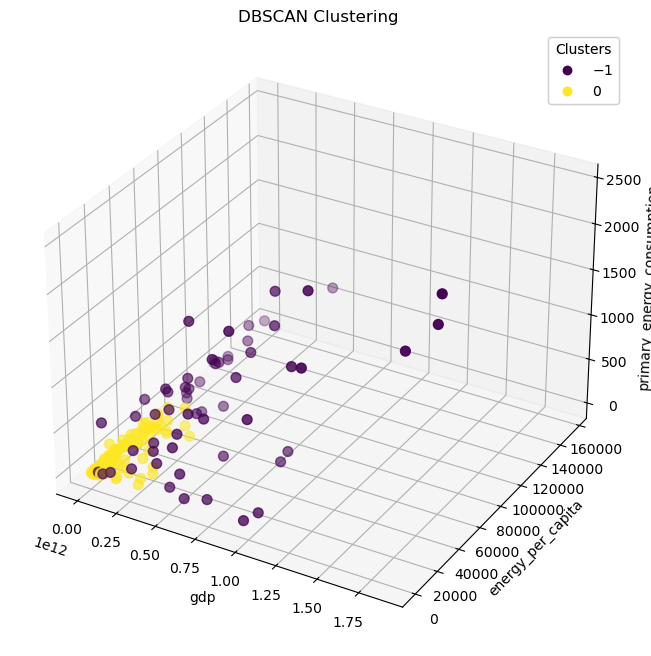

In [236]:
from sklearn.cluster import DBSCAN

# Supongamos que 'X' es tu conjunto de datos
# También asumimos que ya has identificado y tratado outliers si es necesario

# Escala los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_)
# features = ["gdp", "energy_per_capita", "primary_energy_consumption" , "population"]
# Aplica DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Puedes ajustar eps y min_samples según tus necesidades
dbscan_labels = dbscan.fit_predict(X_scaled)

# Añade las etiquetas al DataFrame original
X_with_labels = pd.DataFrame(X_, columns=['gdp', 'energy_per_capita', 'primary_energy_consumption', 'population'])
X_with_labels['Cluster'] = dbscan_labels

# Visualización de los clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_with_labels['gdp'], X_with_labels['energy_per_capita'], X_with_labels['primary_energy_consumption'],
                     c=X_with_labels['Cluster'], cmap='viridis', s=50)

ax.set_xlabel('gdp')
ax.set_ylabel('energy_per_capita')
ax.set_zlabel('primary_energy_consumption')
ax.set_title('DBSCAN Clustering')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()
